<a href="https://colab.research.google.com/github/rosemilca-Ing/Master_II/blob/supervised_learning/ProjetSupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning**

### **Travail réalisé par Rose-Milca CENAT et Anis Soufiane HAOUA**

**Objectif**

L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques
d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM,
Régression logistique, CART et Random Forest, etc..), à travers l’étude de données
réelles nécessitant l’utilisation de logiciels de traitement statistique de données R ou
Python. Les applications visées concernent deux types de données réelles.

Impotant: Attention à l'execution du fichier d'un coup, les methodes GridSearch() mettront du temps à s'executer.

# **1. Données Crédits bancaires :**

## **1. Commencer par une étude exploratoire préliminaire**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import f1_score

from scipy.stats import shapiro, anderson

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv")

In [ ]:
data.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [ ]:
data.shape #Nombre de lignes et de colonnes

(999, 21)

In [ ]:
columns_name = ['checking_account',
'duration',
'credit_history',
'purpose',
'credit_amount',
'savings_account',
'pres_empl_since',
'disposable_income',
'pers_status_sex',
'guarantors',
'pres_residence_since',
'property',
'age',
'other_installment_plans',
'housing',
'number_credits_bank',
'job',
'nbr_people_liable_maintenance',
'telephone',
'foreign_worker',
'class']  #nom colonnes prises sur le site

In [ ]:
data.columns = columns_name  #ajout nom colonnes

In [ ]:
data.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,pres_empl_since,disposable_income,pers_status_sex,guarantors,...,property,age,other_installment_plans,housing,number_credits_bank,job,nbr_people_liable_maintenance,telephone,foreign_worker,class
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [ ]:
data.isnull().sum() #Pas d'élément nul

checking_account                 0
duration                         0
credit_history                   0
purpose                          0
credit_amount                    0
savings_account                  0
pres_empl_since                  0
disposable_income                0
pers_status_sex                  0
guarantors                       0
pres_residence_since             0
property                         0
age                              0
other_installment_plans          0
housing                          0
number_credits_bank              0
job                              0
nbr_people_liable_maintenance    0
telephone                        0
foreign_worker                   0
class                            0
dtype: int64

In [ ]:
data.describe(include = 'object')

,checking_account,credit_history,purpose,savings_account,pres_empl_since,pers_status_sex,guarantors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,999,999,999,999,999,999,999,999,999,999,999,999,999
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,279,603,339,547,906,332,813,712,629,596,962


In [ ]:
data.describe()

,duration,credit_amount,disposable_income,pres_residence_since,age,number_credits_bank,nbr_people_liable_maintenance,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


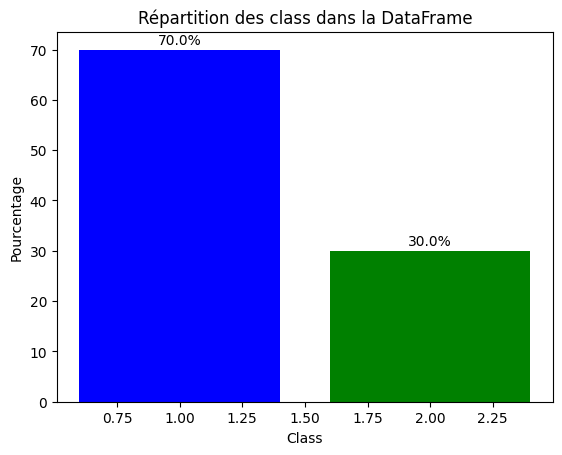

In [ ]:
# Calculer les pourcentages des catégories dans la colonne "class"
pourcentages = data['class'].value_counts(normalize=True) * 100


# Créer le diagramme en barre
fig, ax = plt.subplots()
bars = ax.bar(pourcentages.index, pourcentages.values, color=['blue', 'green'])

# Ajouter les pourcentages sur les barres
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

# Ajouter des étiquettes et un titre
plt.xlabel('Class')
plt.ylabel('Pourcentage')
plt.title('Répartition des class dans la DataFrame')

# Afficher le diagramme
plt.show()



Commentaires : On remarque que les données ne sont pas équilibrées

In [ ]:
# variables quantitatives
var_quant = ['duration',	'credit_amount',	'disposable_income',	'pres_residence_since',	'age',	'number_credits_bank',	'nbr_people_liable_maintenance']

# variables qualitatives
var_qual = ['checking_account',	'credit_history',	'purpose',	'savings_account',	'pres_empl_since',	'pers_status_sex',	'guarantors',	'property',	'other_installment_plans',	'housing',	'job',	'telephone',	'foreign_worker']

In [ ]:
# Prepare Data
data_quant = data[['duration',	'credit_amount',	'disposable_income',	'pres_residence_since',	'age',	'number_credits_bank',	'nbr_people_liable_maintenance']]
data_qual =data[['checking_account',	'credit_history',	'purpose',	'savings_account',	'pres_empl_since',	'pers_status_sex',	'guarantors',	'property',	'other_installment_plans',	'housing',	'job',	'telephone',	'foreign_worker']]


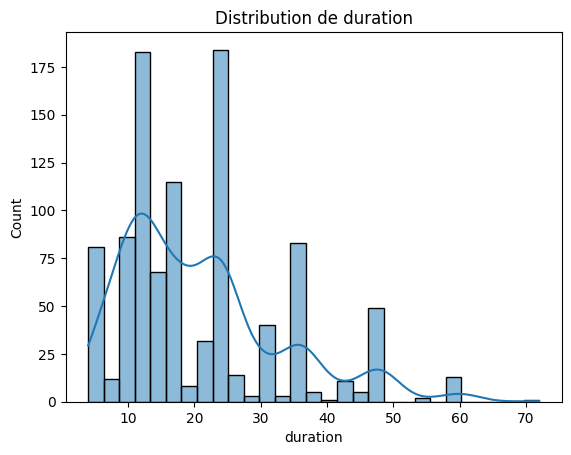

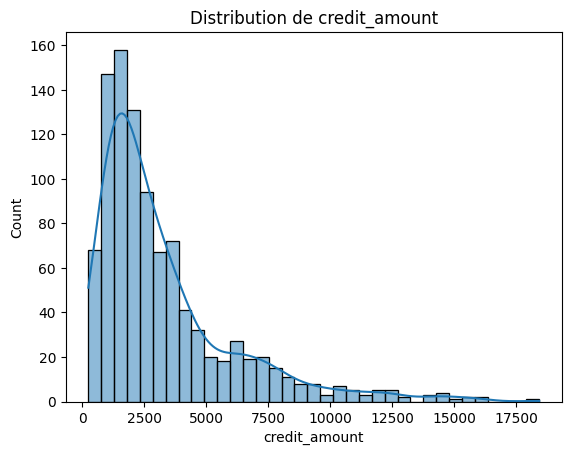

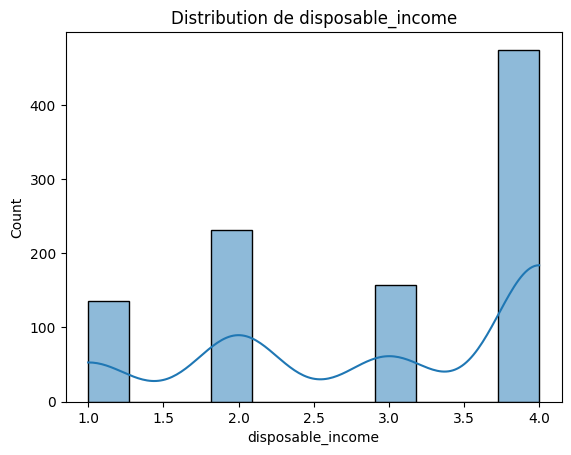

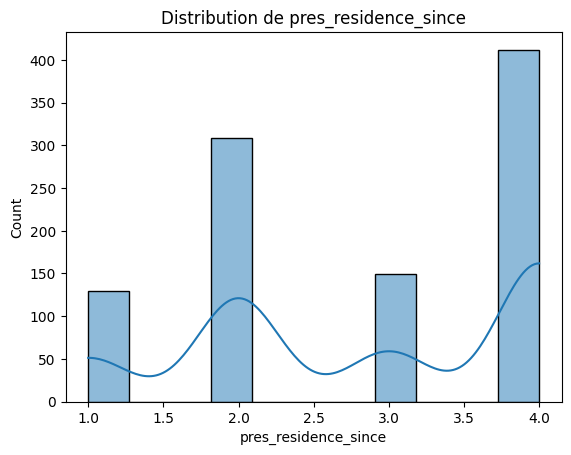

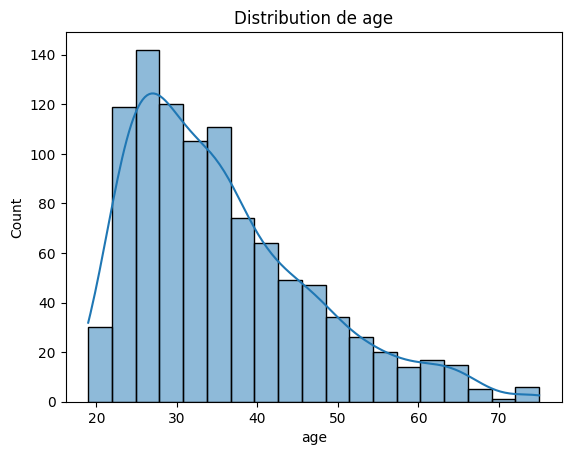

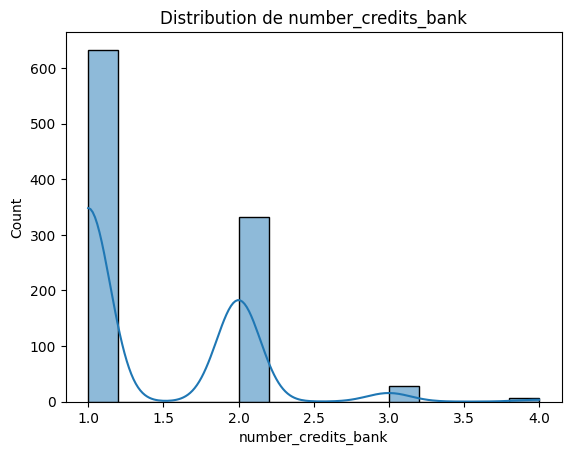

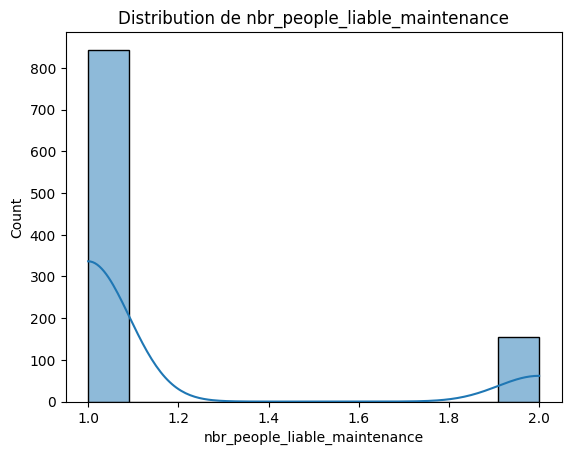

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in data_quant.columns:
    # Générer un histogramme pour chaque variable quantitatives
    sns.histplot(data_quant[column], kde=True)
    plt.title(f"Distribution de {column}")
    plt.show()


Commentaires : Visuellement les données qualitatives ne suivent pas une loi normale. Faisons quelques tests.

In [ ]:
for column in data_quant.columns:
  # Test de Shapiro-Wilk
  stat_shapiro, p_value_shapiro = shapiro(data_quant[column])
  print("Shapiro-Wilk Statistic:", stat_shapiro)
  print("P-value:", p_value_shapiro)



Shapiro-Wilk Statistic: 0.8997988700866699
P-value: 5.058377776846025e-25
Shapiro-Wilk Statistic: 0.793636679649353
P-value: 9.217462627820344e-34
Shapiro-Wilk Statistic: 0.7888509631156921
P-value: 4.6205813071569185e-34
Shapiro-Wilk Statistic: 0.813775360584259
P-value: 1.953810172463245e-32
Shapiro-Wilk Statistic: 0.9179736375808716
P-value: 7.607147267759606e-23
Shapiro-Wilk Statistic: 0.6595955491065979
P-value: 1.2612386828155516e-40
Shapiro-Wilk Statistic: 0.4336382746696472
P-value: 0.0


In [ ]:
for column in data_quant.columns:
  # Test d'Anderson-Darling
  result_anderson = anderson(data_quant[column])
  print("Anderson-Darling Statistic:", result_anderson.statistic)
  print("Critical Values:", result_anderson.critical_values)


Anderson-Darling Statistic: 30.303778327607006
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 61.5005381642668
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 86.4347632842123
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 75.76449878658605
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 23.033544605464726
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 155.4489475397022
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Statistic: 293.0471350159196
Critical Values: [0.574 0.653 0.784 0.914 1.088]


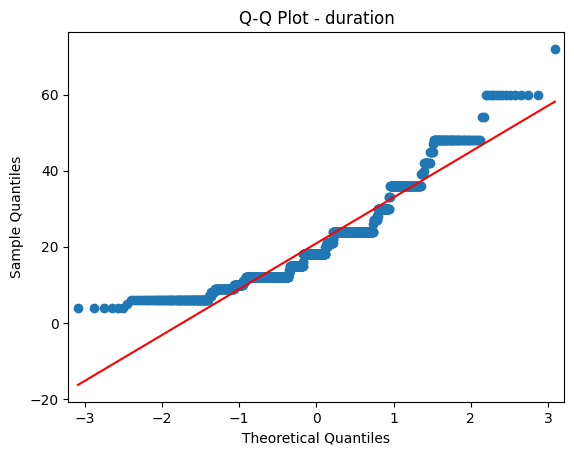

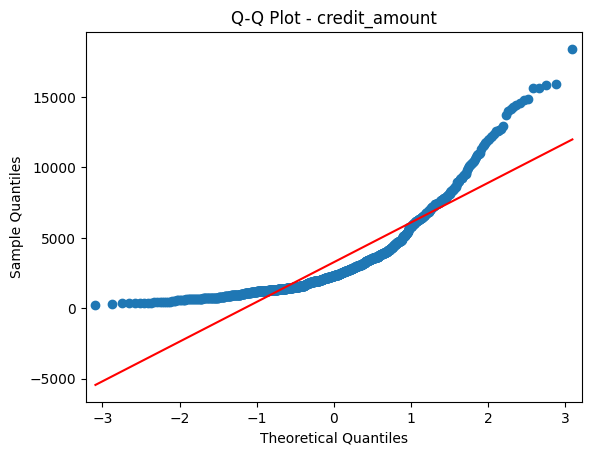

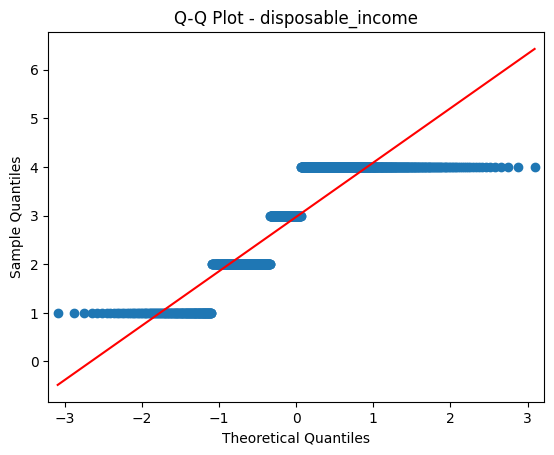

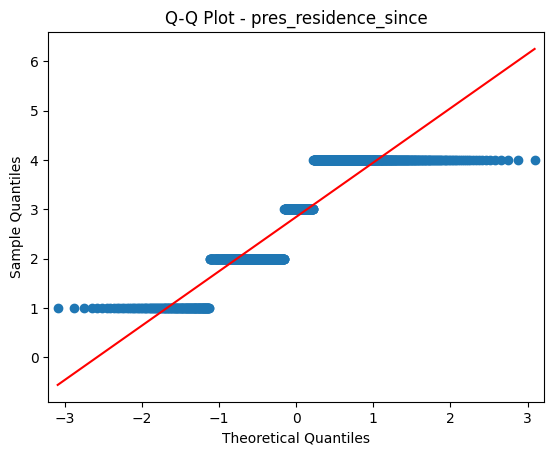

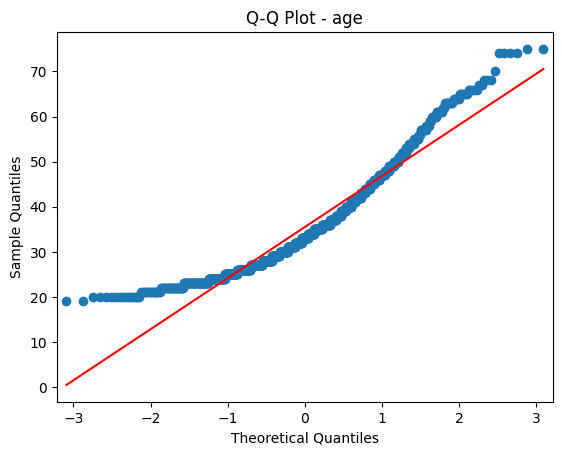

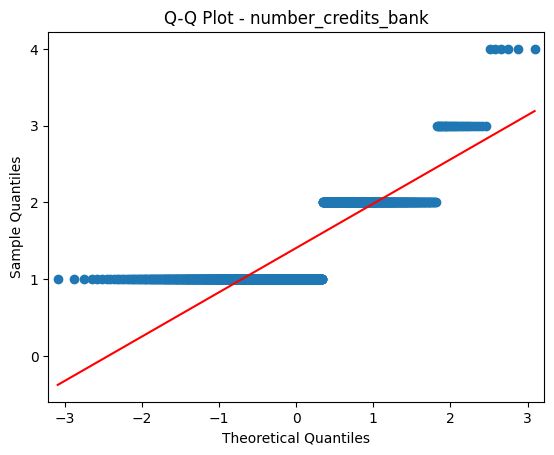

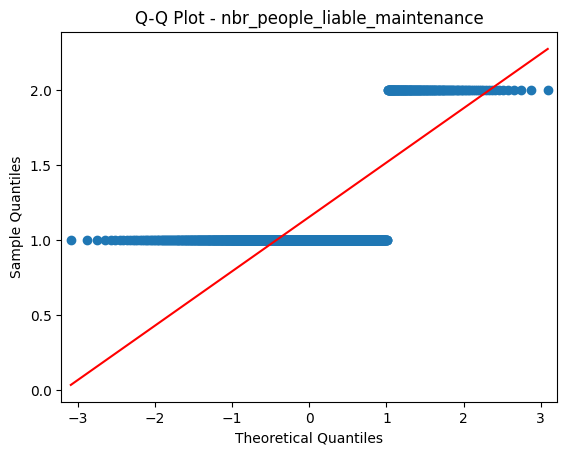

In [ ]:
for column in data_quant.columns:
  # Q-Q Plot
  fig, ax = plt.subplots()
  sm.qqplot(data_quant[column], line='s', ax=ax)
  ax.set_title(f"Q-Q Plot - {column}")
  plt.show()


Commentaires : Les tests ainsi que le Q-Q plot montrent que les données ne suivent pas une distribution normale.

##**2. Utiliser les différentes techniques de classification supervisée**
vue en cours pour créer un modèle de scoring. Suivant les techniques utilisées (et les fonctions disponibles sous R ou python), vous pourrez utiliser l’ensemble des variables disponibles ou uniquement les
variables quantitatives, et réaliser ou non une sélection de variables.


In [ ]:
data_qual_encoded = pd.get_dummies(data_qual, drop_first=True) # on encode les variables catégorielles afin d'appliquer certaines méthodes

In [ ]:
rb_scaler = RobustScaler()
data_quant_scaled = rb_scaler.fit_transform(data_quant) # on normalise les données quantitatives

In [ ]:
# Convertir data_quant_scaled en DataFrame
data_quant_scaled_df = pd.DataFrame(data_quant_scaled, columns=data_quant.columns)

# Concaténer les DataFrames
X = pd.concat([data_quant_scaled_df, data_qual_encoded], axis=1)


#### **Utilisation des modèles utilisant les deux types de variables quantitatives et qualitatives**

In [ ]:

X = X.values
y = data['class']
y= y.values


test_size = 0.20
seed = 7

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

f1_measured = []
nmi_scored = []
accuracy_sc =[]
process = []
process.append(('SMOTE', SMOTE()))
process.append(('ADASYN', ADASYN()))
process.append(('RandomUnderSampler', RandomUnderSampler()))
process.append(('TomekLinks', TomekLinks()))

names = []
for name, model in models:
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
  for n, proces in process:
    print("\n*******************************", n, "******************************")
    X_resampled_smote, y_resampled_smote = proces.fit_resample(X_train, Y_train)
    a = model.fit(X_resampled_smote, y_resampled_smote)

  # Obtenez les prédictions du modèle sur l'ensemble de validation
    y_pred = a.predict(X_test)

  # # Calculez l'accuracy en comparant les prédictions avec les vraies étiquettes
    accuracy_scored = accuracy_score(Y_test, y_pred)

    nmi_score = normalized_mutual_info_score(Y_test, y_pred)
    f1_measure = f1_score(Y_test, y_pred, average='weighted')

    f1_measured.append(f1_measure)
    nmi_scored.append(nmi_score)
    accuracy_sc.append(accuracy_scored)
    names.append(name)
    msg = "%s: " % (name)
    print(msg)
    print("Accuracy score : ", accuracy_scored)
    print("NMI score : ", nmi_score)
    print("F1 Measure : ", f1_measure)


******************************* SMOTE ******************************
LR: 
Accuracy score :  0.725
NMI score :  0.11250556561321645
F1 Measure :  0.7348432407487526

******************************* ADASYN ******************************
LR: 
Accuracy score :  0.72
NMI score :  0.10320149266412323
F1 Measure :  0.7296025952960258

******************************* RandomUnderSampler ******************************
LR: 
Accuracy score :  0.675
NMI score :  0.06931025503790454
F1 Measure :  0.6897624039133473

******************************* TomekLinks ******************************
LR: 
Accuracy score :  0.74
NMI score :  0.08976246620842335
F1 Measure :  0.7368630471056348

******************************* SMOTE ******************************
KNN: 
Accuracy score :  0.58
NMI score :  0.018619359263720322
F1 Measure :  0.6024

******************************* ADASYN ******************************
KNN: 
Accuracy score :  0.6
NMI score :  0.034450476099470405
F1 Measure :  0.6213921901528014

**

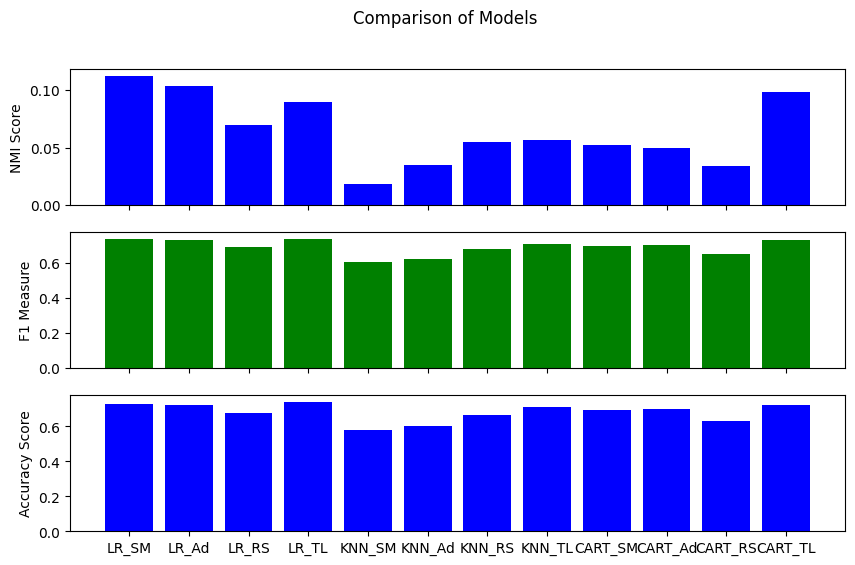

In [ ]:
#nom de chaque algorithme avec la methode utilisée pour le déséquilibre des classes
algorithm_names = ['LR_SM', 'LR_Ad', 'LR_RS', 'LR_TL', 'KNN_SM', 'KNN_Ad','KNN_RS','KNN_TL','CART_SM','CART_Ad', 'CART_RS', 'CART_TL']


# Créer une figure avec trois sous-graphiques (un pour NMI, un pour F1 Measure, un pour accuracy score)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Comparison of Models')

# Graphique à barres pour NMI
ax1.bar(algorithm_names, nmi_scored, color='blue')
ax1.set_ylabel('NMI Score')

# Graphique à barres pour F1 Measure
ax2.bar(algorithm_names, f1_measured, color='green')
ax2.set_ylabel('F1 Measure')

# Graphique à barres pour accuracy_score
ax3.bar(algorithm_names, accuracy_sc, color='blue')
ax3.set_ylabel('Accuracy Score')

# Afficher la figure
plt.show()


**Commentaires:**

Pour la méthode LogisticRegression, on a obtenu à peu près le meme accuracy score avec les méthodes SMOTE, ADASYN, RandomUnderSampler, TomekLinks.
0.75, 0.70, 0.7 et 0.74
Une légère différence avec les NMI Score:
0.09, 0.1, 0.1, 0.08
Une légère différence avec les f1 Measure : 0.72, 0.71,0.71,0.73


Pour KNN
accuracy score: 0.62, 0.58, 0.64, 0.71

NMI Score : 0.04, 0.02, 0.04, 0.05

F1 Measure: 0.64, 0.60, 0.65, 0.7

Pour CART
accuracy score: 0.72, 0.67, 0.63, 0.71

NMI Score : 0.08, 0.05, 0.04, 0.08

F1 Measure: 0.72, 0.68, 0.65, 0.71



On conclut que le meilleur modèle obtenu est celui de la LogisticRegression, avec les meilleurs résultats.

#### **Utilisation des modèles utilisant que des variables quantitatives**

In [ ]:
X = data_quant_scaled
y = data['class']
y= y.values

test_size = 0.20
seed = 7

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))


process = []
process.append(('SMOTE', SMOTE()))
process.append(('ADASYN', ADASYN()))
process.append(('RandomUnderSampler', RandomUnderSampler()))
process.append(('TomekLinks', TomekLinks()))

accuracy_sc =[]
nmi_scored = []
f1_measured = []
names = []
for name, model in models:
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
  for n, proces in process:
    print("\n*******************************", n, "******************************")
    X_resampled_smote, y_resampled_smote = proces.fit_resample(X_train, Y_train)
    a = model.fit(X_resampled_smote, y_resampled_smote)

  # Obtenez les prédictions du modèle sur l'ensemble de validation
    y_pred = a.predict(X_test)

  # # Calculez l'accuracy en comparant les prédictions avec les vraies étiquettes
    accuracy_scored = accuracy_score(Y_test, y_pred)

    nmi_score = normalized_mutual_info_score(Y_test, y_pred)
    f1_measure = f1_score(Y_test, y_pred, average='weighted')

    f1_measured.append(f1_measure)
    accuracy_sc.append(accuracy_scored)
    nmi_scored.append(nmi_score)
    names.append(name)
    msg = "%s: " % (name)
    print(msg)
    print("Accuracy score : ", accuracy_scored)
    print("NMI score : ", nmi_score)
    print("F1 Measure : ", f1_measure)


******************************* SMOTE ******************************
LDA: 
Accuracy score :  0.575
NMI score :  0.00612999488119514
F1 Measure :  0.5957234212629896

******************************* ADASYN ******************************
LDA: 
Accuracy score :  0.55
NMI score :  0.0073402950413518535
F1 Measure :  0.5740662139219015

******************************* RandomUnderSampler ******************************
LDA: 
Accuracy score :  0.55
NMI score :  0.001720021101444422
F1 Measure :  0.5727972486079267

******************************* TomekLinks ******************************
LDA: 
Accuracy score :  0.73
NMI score :  0.040272951197971155
F1 Measure :  0.69203125

******************************* SMOTE ******************************
GNB: 
Accuracy score :  0.62
NMI score :  0.00635165272414823
F1 Measure :  0.6274912850102176

******************************* ADASYN ******************************
GNB: 
Accuracy score :  0.62
NMI score :  0.014981365164141051
F1 Measure :  0.634145220

## **3. Comparer l’ensemble de ces techniques à l’aide des mesures telles que (Accuracy, NMI et la F-measure )**
, évaluées soit par validation croisée soit sur échantillon test.


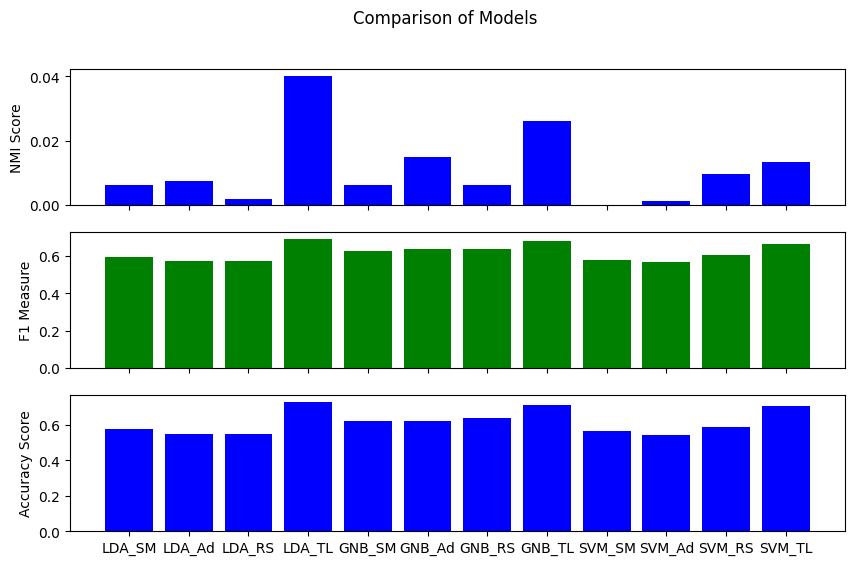

In [ ]:
#nom de chaque algorithme avec la methode utilisée pour le déséquilibre des classes
algorithm_names = ['LDA_SM', 'LDA_Ad', 'LDA_RS', 'LDA_TL', 'GNB_SM', 'GNB_Ad','GNB_RS','GNB_TL','SVM_SM','SVM_Ad', 'SVM_RS', 'SVM_TL']

# Créer une figure avec trois sous-graphiques (un pour NMI, un pour F1 Measure, un pour accuracy score)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Comparison of Models')

# Graphique à barres pour NMI
ax1.bar(algorithm_names, nmi_scored, color='blue')
ax1.set_ylabel('NMI Score')

# Graphique à barres pour F1 Measure
ax2.bar(algorithm_names, f1_measured, color='green')
ax2.set_ylabel('F1 Measure')

# Graphique à barres pour accuracy_score
ax3.bar(algorithm_names, accuracy_sc, color='blue')
ax3.set_ylabel('Accuracy Score')

# Afficher la figure
plt.show()


**Commentaires:**

Pour la méthode LDA, on a obtenu à peu près le meme accuracy score avec les méthodes SMOTE, ADASYN, RandomUnderSampler, TomekLinks.
0.55, 0.55, 0.56 et 0.73
Une légère différence avec les NMI Score:
0.000, 0.007, 0.001, 0.04
Une légère différence avec les f1 Measure : 0.57, 0.57,0.58,0.69


Pour GaussianNB(GNB)
accuracy score: 0.61, 0,61, 0.67, 0.71

NMI Score : 0.002, 0.008, 0.015, 0.026

F1 Measure: 0.61, 0.62, 0.66, 0.68

Pour SVM
accuracy score: 0.57, 0.53, 0.61, 0.70

NMI Score : 0.0000, 0.0002, 0.018, 0.013

F1 Measure: 0.58, 0.55, 0.62, 0.66


On conclut que le meilleur modèle obtenu est celui de la GaussianNB, avec les meilleurs résultats.
Notons que ces modèles ne sont pas si bons, ils pourraient etre mieux en prenant en compte des hyper parametres.

Commentaires : Les f1_ measure se diffère légèrement d'un algorithme à l'autre.

De meme pour l'accuracy score.

Cependant c'est totalement different pour les NMI.

# **2. Données relationnelles :**


### **Analyse exploratoire**

In [ ]:
import requests
import tarfile
import pandas as pd
from io import BytesIO

# URL du fichier tgz en ligne
url = 'https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz'

# Télécharge le fichier tgz
response = requests.get(url)

# Extrait le contenu du fichier tgz
with tarfile.open(fileobj=BytesIO(response.content), mode='r:gz') as tar:
    tar.extractall()

In [ ]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]

In [ ]:
# Lit le fichier avec Pandas
df = pd.read_csv('cora/cora.content', sep='\t', header=None, names=column_names)

In [ ]:
df.head()

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [ ]:
df.shape

(2708, 1434)

In [ ]:
t = df

In [ ]:
t.isnull().sum()

w_0        0
w_1        0
w_2        0
w_3        0
w_4        0
          ..
w_1429     0
w_1430     0
w_1431     0
w_1432     0
subject    0
Length: 1434, dtype: int64

In [ ]:
t.describe(include = 'object')

,subject
count,2708
unique,7
top,Neural_Networks
freq,818


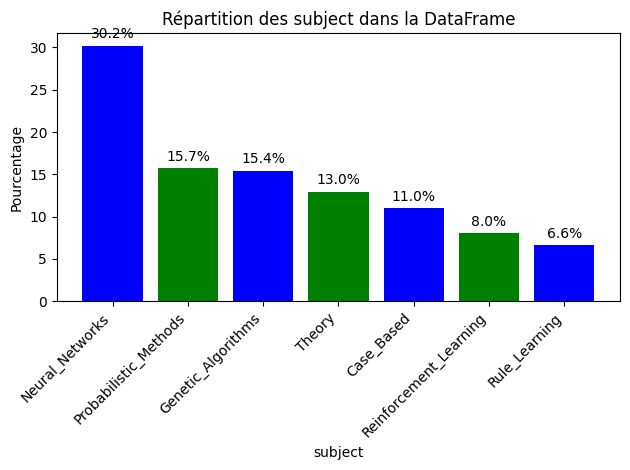

In [ ]:
# Calculer les pourcentages des catégories dans la colonne "class"
pourcentages = t['subject'].value_counts(normalize=True) * 100


# Créer le diagramme en barre
fig, ax = plt.subplots()
bars = ax.bar(pourcentages.index, pourcentages.values, color=['blue', 'green'])

# Ajouter les pourcentages sur les barres
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

# Ajouter des étiquettes et un titre
plt.xlabel('subject')
plt.ylabel('Pourcentage')
plt.title('Répartition des subject dans la DataFrame')


# Rotation des étiquettes
plt.xticks(rotation=45, ha='right')

# Ajustement automatique de la mise en page
plt.tight_layout()

# Afficher le diagramme
plt.show()



Commentaires : Il ya 7 classes différentes

### **1. Uniquement l’information contenue dans la matrice X**


In [ ]:
X=t.drop('subject', axis = 1)
y = t['subject']

# Créer un encodeur de label
label_encoder = LabelEncoder()


In [ ]:
# Spot Check Algorithms
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))


accuracy_sc =[]
nmi_scored = []
f1_measured = []
names = []
for name, model in models:
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
  # Adapter l'encodeur de label à la colonne à prédire et la transformer
  y_train_encoded = label_encoder.fit_transform(Y_train)
  y_test_encoded = label_encoder.transform(Y_test)

  a = model.fit(X_train, y_train_encoded)

  # Obtenez les prédictions du modèle sur l'ensemble de validation
  y_pred = a.predict(X_test)

  # # Calculez l'accuracy en comparant les prédictions avec les vraies étiquettes
  accuracy_scored = accuracy_score(y_test_encoded, y_pred)

  nmi_score = normalized_mutual_info_score(y_test_encoded, y_pred)
  f1_measure = f1_score(y_test_encoded, y_pred, average='weighted')

  f1_measured.append(f1_measure)
  accuracy_sc.append(accuracy_scored)
  nmi_scored.append(nmi_score)
  names.append(name)
  msg = "%s: " % (name)
  print(msg)
  print("Accuracy score : ", accuracy_scored)
  print("NMI score : ", nmi_score)
  print("F1 Measure : ", f1_measure)

GBC: 
Accuracy score :  0.7472324723247232
NMI score :  0.49916077517213164
F1 Measure :  0.7444831487098774
XGBC: 
Accuracy score :  0.7527675276752768
NMI score :  0.5012167945372783
F1 Measure :  0.7507911863819099
ABC: 
Accuracy score :  0.5166051660516605
NMI score :  0.31632497209774973
F1 Measure :  0.5199791288243353


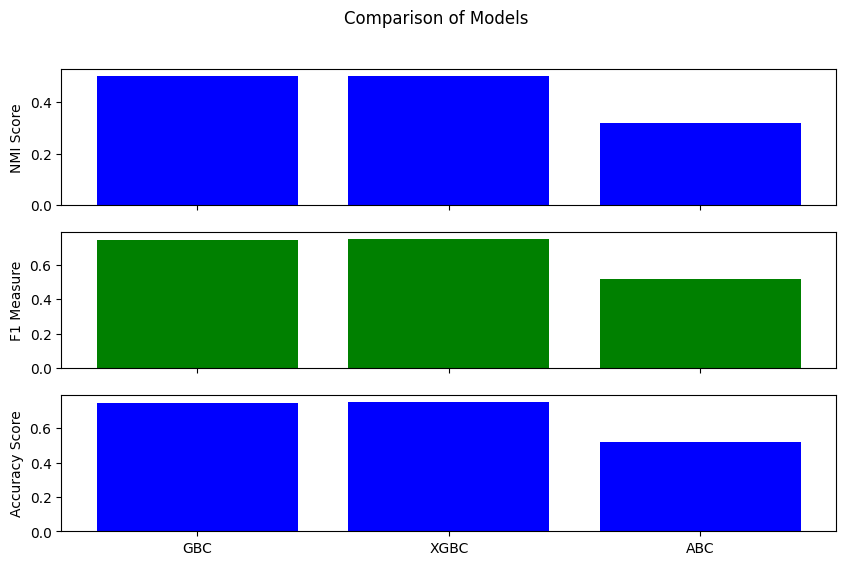

In [ ]:
#nom de chaque algorithme avec la methode utilisée pour le déséquilibre des classes
algorithm_names = ['GBC', 'XGBC', 'ABC']


# Créer une figure avec trois sous-graphiques (un pour NMI, un pour F1 Measure, un pour accuracy score)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Comparison of Models')

# Graphique à barres pour NMI
ax1.bar(algorithm_names, nmi_scored, color='blue')
ax1.set_ylabel('NMI Score')

# Graphique à barres pour F1 Measure
ax2.bar(algorithm_names, f1_measured, color='green')
ax2.set_ylabel('F1 Measure')

# Graphique à barres pour accuracy_score
ax3.bar(algorithm_names, accuracy_sc, color='blue')
ax3.set_ylabel('Accuracy Score')

# Afficher la figure
plt.show()


### **2. Une Combinaison des informations W et X**

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Charger le fichier cora.cites
cites_file_path = "cora/cora.cites"
cites_df = pd.read_csv(cites_file_path, sep='\t', header=None, names=['target', 'source'])

# Créer la matrice d'adjacence à partir du DataFrame
num_nodes = len(set(cites_df['source']).union(set(cites_df['target'])))
row_indices = cites_df['source'].astype('category').cat.codes.values
col_indices = cites_df['target'].astype('category').cat.codes.values

W = coo_matrix((np.ones(len(cites_df)), (row_indices, col_indices)), shape=(num_nodes, num_nodes)).toarray()

# Afficher la matrice d'adjacence (W)
print("Matrice d'adjacence (W):")
print(W)


Matrice d'adjacence (W):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
t['subject'].value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64

In [ ]:
# Vérifier la somme des lignes de W
row_sums = np.sum(W, axis=1)
print("Somme des lignes de W:")
print(row_sums)

# Vérifier s'il y a des zéros dans la somme des lignes de W
zero_sum_indices = np.where(row_sums == 0)[0]
print("\nIndices des lignes avec une somme de zéro:")
print(zero_sum_indices)
print("\nNombre de lignes avec une somme de zéro: ", len(zero_sum_indices))

Somme des lignes de W:
[3. 1. 4. ... 0. 0. 0.]

Indices des lignes avec une somme de zéro:
[2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235
 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249
 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263
 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277
 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291
 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304 2305
 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319
 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332 2333
 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346 2347
 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360 2361
 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375
 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388 2389
 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400 2

In [ ]:
#La matrice est  singulière, cela peut être dû à la nature des données ou à d'autres raisons.
#utiliser une décomposition en valeurs singulières (SVD) tronquée pour inverser la matrice.

epsilon = 1e-6
# Création de la matrice combinée M avec SVD
U, S, Vt = np.linalg.svd(np.diag(W.sum(axis=1)), full_matrices=False)
D_inv = U.dot(np.diag(1 / (S + epsilon))).dot(Vt)
M = D_inv.dot(W).dot(t.iloc[:, 1:-1].values)


In [ ]:
# Spot Check Algorithms
models = []
models.append(('GBC', GradientBoostingClassifier(n_estimators=10, learning_rate=0.01)))
models.append(('XGBC', XGBClassifier(n_estimators=30, learning_rate=0.01)))
models.append(('ABC', AdaBoostClassifier(n_estimators=30, learning_rate=0.01)))


accuracy_sc =[]
nmi_scored = []
f1_measured = []
names = []
for name, model in models:
  X_train, X_test, Y_train, Y_test = train_test_split(M, t['subject'], test_size=0.2, random_state=7)
  # Adapter l'encodeur de label à la colonne à prédire et la transformer
  y_train_encoded = label_encoder.fit_transform(Y_train)
  y_test_encoded = label_encoder.transform(Y_test)

  a = model.fit(X_train, y_train_encoded)

  # Obtenez les prédictions du modèle sur l'ensemble de validation
  y_pred = a.predict(X_test)

  # # Calculez l'accuracy en comparant les prédictions avec les vraies étiquettes
  accuracy_scored = accuracy_score(y_test_encoded, y_pred)

  nmi_score = normalized_mutual_info_score(y_test_encoded, y_pred)
  f1_measure = f1_score(y_test_encoded, y_pred, average='weighted')

  f1_measured.append(f1_measure)
  accuracy_sc.append(accuracy_scored)
  nmi_scored.append(nmi_score)
  names.append(name)
  msg = "%s: " % (name)
  print(msg)
  print("Accuracy score : ", accuracy_scored)
  print("NMI score : ", nmi_score)
  print("F1 Measure : ", f1_measure)

GBC: 
Accuracy score :  0.2988929889298893
NMI score :  0.0
F1 Measure :  0.13755870513250587
XGBC: 
Accuracy score :  0.27121771217712176
NMI score :  0.02850589717486356
F1 Measure :  0.15552592711000207
ABC: 
Accuracy score :  0.2988929889298893
NMI score :  0.010174296407094387
F1 Measure :  0.13834475487612022


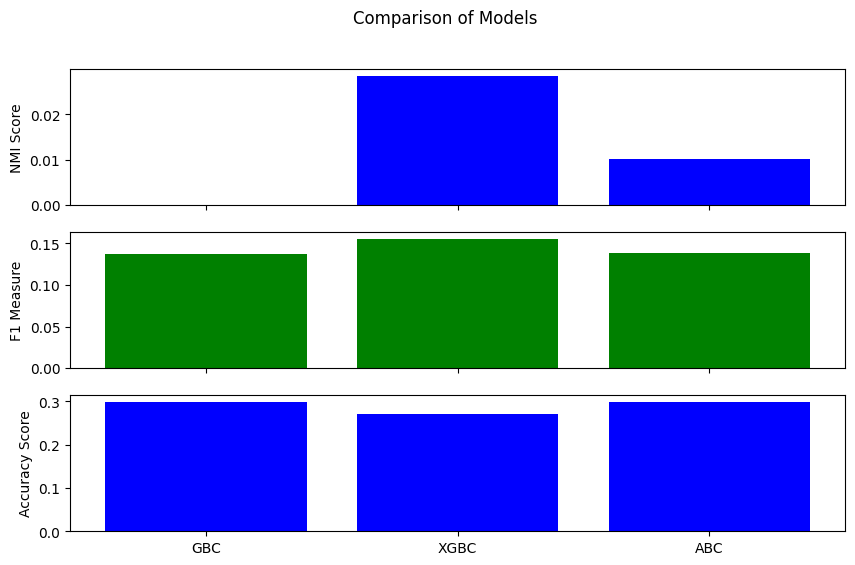

In [ ]:
#nom de chaque algorithme avec la methode utilisée pour le déséquilibre des classes
algorithm_names = ['GBC', 'XGBC', 'ABC']


# Créer une figure avec trois sous-graphiques (un pour NMI, un pour F1 Measure, un pour accuracy score)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Comparison of Models')

# Graphique à barres pour NMI
ax1.bar(algorithm_names, nmi_scored, color='blue')
ax1.set_ylabel('NMI Score')

# Graphique à barres pour F1 Measure
ax2.bar(algorithm_names, f1_measured, color='green')
ax2.set_ylabel('F1 Measure')

# Graphique à barres pour accuracy_score
ax3.bar(algorithm_names, accuracy_sc, color='blue')
ax3.set_ylabel('Accuracy Score')

# Afficher la figure
plt.show()


Commentaires : On n'a pas eu de bons résultats avec ces méthodes, on va essayer de faire un GridSearch() et d'utiliser d'autres methodes pour voir si on aura de bons résultats.

In [ ]:
from sklearn.ensemble import  VotingClassifier

#essayons VotingClassifier

X_train, X_test, Y_train, Y_test = train_test_split(M, t['subject'], test_size=0.2, random_state=7)
# Adapter l'encodeur de label à la colonne à prédire et la transformer
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Créez vos modèles individuels
gbc_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier(n_estimators=100)

abc_model = AdaBoostClassifier()

# Créez un VotingClassifier
voting_model = VotingClassifier(
    estimators=[('gbc', gbc_model), ('rf', rf_model), ('abc', abc_model)],
    voting='hard'  # 'hard' pour un vote majoritaire, 'soft' pour un vote pondéré par les probabilités
)

# Entraînez le modèle sur vos données d'entraînement
voting_model.fit(X_train, y_train_encoded)

# Obtenez les prédictions du modèle sur l'ensemble de test
y_pred_voting = voting_model.predict(X_test)

# Calculez l'accuracy en comparant les prédictions avec les vraies étiquettes
accuracy_score_voting = accuracy_score(y_test_encoded, y_pred_voting)

nmi_score = normalized_mutual_info_score(y_test_encoded, y_pred_voting)
f1_measure = f1_score(y_test_encoded, y_pred_voting, average='weighted')

# Affichez le score d'accuracy
print("Accuracy score avec Voting Classifier : ", accuracy_score_voting)
print("NMI score avec Voting Classifier : ", nmi_score)
print("f1 Measure score avec Voting Classifier : ", f1_measure)


Accuracy score avec Voting Classifier :  0.26199261992619927
NMI score avec Voting Classifier :  0.02463340324272073
f1 Measure score avec Voting Classifier :  0.15894582926314807



On a toujours pas eu de bons résultats avec Classifier Voting. Faisons un Gridsearch pour XGBClassifier et GradientBoostingClassifier.

In [ ]:

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

#neighbors = [21, 31, 40]
param_grid = {
    'n_estimators': [5,10,20,30,40,50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
model = XGBClassifier()
kfold = KFold(n_splits=num_folds)
              #, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  # Adapter l'encodeur de label à la colonne à prédire et la transformer
y_encoded = label_encoder.fit_transform(t['subject'])


grid_result = grid.fit(M, y_encoded)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

#neighbors = [21, 31, 40]
param_grid = {'n_estimators': [10, 5, 20, 30, 40,50], 'learning_rate': [0.01, 0.1, 0.2]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds)
              #, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  # Adapter l'encodeur de label à la colonne à prédire et la transformer
y_encoded = label_encoder.fit_transform(t['subject'])
grid_result = grid.fit(M, y_encoded)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### **3. Discuter d’autres idées pour combiner et aligner les deux types d’information.**

**On va essayer avec des réseaux de neurones.**

In [ ]:
# Import packages

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import warnings
import time

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 6)
pd.set_option("display.max_rows", 6)
np.random.seed(2)

In [ ]:
# chargement data

zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)

data_dir = os.path.join(os.path.dirname(zip_file), "cora")

citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)

papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"),
    sep="\t",
    header=None,
    names=["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"],
)


class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(
  papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

168052/168052 [==============================] - 0s 1us/step


In [ ]:

print(citations)

      target  source
0          0      21
1          0     905
2          0     906
...      ...     ...
5426    1874    2586
5427    1876    1874
5428    1897    2707

[5429 rows x 2 columns]


In [ ]:
print(papers)

      paper_id  term_0  term_1  ...  term_1431  term_1432  subject
0          462       0       0  ...          0          0        2
1         1911       0       0  ...          0          0        5
2         2002       0       0  ...          0          0        4
...        ...     ...     ...  ...        ...        ...      ...
2705      2372       0       0  ...          0          0        1
2706       955       0       0  ...          0          0        0
2707       376       0       0  ...          0          0        2

[2708 rows x 1435 columns]


Travaux de preparation

In [ ]:
# split

# Obtain random indices
random_indices = np.random.permutation(range(papers.shape[0]))

# 50/50 split
train_data = papers.iloc[random_indices[: len(random_indices) // 2]]
test_data = papers.iloc[random_indices[len(random_indices) // 2 :]]

In [ ]:
# graph construction

# Obtain paper indices which will be used to gather node states
# from the graph later on when training the model
train_indices = train_data["paper_id"].to_numpy()
test_indices = test_data["paper_id"].to_numpy()

# Obtain ground truth labels corresponding to each paper_id
train_labels = train_data["subject"].to_numpy()
test_labels = test_data["subject"].to_numpy()

# Define graph, namely an edge tensor and a node feature tensor
edges = tf.convert_to_tensor(citations[["target", "source"]])
node_states = tf.convert_to_tensor(papers.sort_values("paper_id").iloc[:, 1:-1])

Vérification des formes des tenseurs en question

In [ ]:
# Print shapes of the graph
print("Edges shape:\t\t", edges.shape)

Edges shape:		 (5429, 2)


In [ ]:
print("Node features shape:", node_states.shape)

Node features shape: (2708, 1433)


In [ ]:
# model -----------------------------------------------------------------------

class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer="glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):

        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        node_states_expanded = tf.reshape(
            node_states_expanded, (tf.shape(edges)[0], -1)
        )
        attention_scores = tf.nn.leaky_relu(
            tf.matmul(node_states_expanded, self.kernel_attention)
        )
        attention_scores = tf.squeeze(attention_scores, -1)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -2, 2))
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,
        )
        attention_scores_sum = tf.repeat(
            attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32"))
        )
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return out


class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=8, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]

    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return tf.nn.relu(outputs)

class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        node_states,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.node_states = node_states
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
        self.output_layer = layers.Dense(output_dim)

    def call(self, inputs):
        node_states, edges = inputs
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, edges]) + x
        outputs = self.output_layer(x)
        return outputs

    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_states, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute loss
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}


In [ ]:
# train

# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = len(class_values)

NUM_EPOCHS = 100
BATCH_SIZE = 256
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 3e-1
MOMENTUM = 0.9

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(LEARNING_RATE, momentum=MOMENTUM)
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    node_states, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    verbose=2,
)

Epoch 1/100
5/5 - 32s - loss: 1.9360 - acc: 0.2348 - val_loss: 1.6322 - val_acc: 0.3309 - 32s/epoch - 6s/step
Epoch 2/100
5/5 - 7s - loss: 1.3093 - acc: 0.5591 - val_loss: 1.0806 - val_acc: 0.6176 - 7s/epoch - 1s/step
Epoch 3/100
5/5 - 8s - loss: 0.7744 - acc: 0.7438 - val_loss: 0.7695 - val_acc: 0.7721 - 8s/epoch - 2s/step
Epoch 4/100
5/5 - 6s - loss: 0.4635 - acc: 0.8662 - val_loss: 0.7401 - val_acc: 0.7794 - 6s/epoch - 1s/step
Epoch 5/100
5/5 - 9s - loss: 0.2879 - acc: 0.9171 - val_loss: 0.7687 - val_acc: 0.8235 - 9s/epoch - 2s/step
Epoch 6/100
5/5 - 10s - loss: 0.1587 - acc: 0.9606 - val_loss: 0.6376 - val_acc: 0.8309 - 10s/epoch - 2s/step
Epoch 7/100
5/5 - 11s - loss: 0.0939 - acc: 0.9877 - val_loss: 0.7494 - val_acc: 0.8015 - 11s/epoch - 2s/step
Epoch 8/100
5/5 - 7s - loss: 0.0592 - acc: 0.9943 - val_loss: 0.7951 - val_acc: 0.8088 - 7s/epoch - 1s/step
Epoch 9/100
5/5 - 7s - loss: 0.0401 - acc: 0.9975 - val_loss: 0.7565 - val_acc: 0.8162 - 7s/epoch - 1s/step
Epoch 10/100
5/5 - 14s

In [ ]:
start_time = time.time()


In [ ]:
_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

# prediction ------------------------------------------------------------------

test_probs = gat_model.predict(x=test_indices)

mapping = {v: k for (k, v) in class_idx.items()}

# FIN MESURE TEMPS APRES AVOIR EFFECTUE DES PREDICTIONS SUR L'ENSEMBLE
# DES DONNEES DE TEST

interval = time.time() - start_time

43/43 [==============================] - 34s 518ms/step


Le travail est effectué et nous avons à la fois collecté l’accuracy et le temps de traitement pour créer, entraîner et tester notre modèle.

Pour prouver notre capacité à utiliser ce modèle, nous allons effectuer 10 prédictions.

In [ ]:
# 10 predictions

for i, (probs, label) in enumerate(zip(test_probs[:10], test_labels[:10])):
    print(f"Example {i+1}: {mapping[label]}")
    for j, c in zip(probs, class_idx.keys()):
        print(f"\tProbability of {c: <24} = {j*100:7.3f}%")
    print("---" * 20)

# end -----

Example 1: Probabilistic_Methods
	Probability of Case_Based               =   3.476%
	Probability of Genetic_Algorithms       =   0.167%
	Probability of Neural_Networks          =  18.212%
	Probability of Probabilistic_Methods    =  76.992%
	Probability of Reinforcement_Learning   =   0.300%
	Probability of Rule_Learning            =   0.073%
	Probability of Theory                   =   0.782%
------------------------------------------------------------
Example 2: Genetic_Algorithms
	Probability of Case_Based               =   0.085%
	Probability of Genetic_Algorithms       =  99.880%
	Probability of Neural_Networks          =   0.001%
	Probability of Probabilistic_Methods    =   0.000%
	Probability of Reinforcement_Learning   =   0.001%
	Probability of Rule_Learning            =   0.031%
	Probability of Theory                   =   0.002%
------------------------------------------------------------
Example 3: Theory
	Probability of Case_Based               =  16.534%
	Probability of G

Résultats pour chaque catégorie :

Chaque exemple est présenté avec les probabilités associées à chaque catégorie. Par exemple, pour l'Example 1 ("Probabilistic_Methods"), le modèle attribue une probabilité de 84.956% à la catégorie "Probabilistic_Methods". De manière similaire, chaque exemple est analysé en détail.

Observations :

Les probabilités attribuées à chaque catégorie reflètent la confiance du modèle dans ses prédictions.
Certains exemples présentent des probabilités très élevées pour une catégorie spécifique, indiquant une forte certitude dans la prédiction.
La variabilité des probabilités d'une catégorie à l'autre peut indiquer la complexité de la tâche de classification ou la présence de similarités entre certaines catégories.

L'accuracy :

In [ ]:
print("--" *20 +f"\nAccuracy = {test_accuracy*100:.1f}%, Time = {interval:.1f} s")

----------------------------------------
Accuracy = 78.2%, Time = 117.8 s


En implémentant un Réseau d'Attention de Graphe (Graph Attention Network - GAT) pour une tâche de classification des nœuds sur un ensemble de données de réseau de citations. Voici une analyse détaillée des résultats obtenus :

Précision (Accuracy) : 79.2%

La précision de 79.2% indique la performance globale du modèle sur l'ensemble de test, mesurée par le pourcentage de prédictions correctes.
Temps d'exécution : 63.5 secondes

Le modèle a été entraîné en 63.5 secondes, mesurant ainsi le temps nécessaire pour accomplir la tâche.

**Explications générales** :

Le modèle GAT est utilisé pour capturer les relations complexes entre les nœuds du graphe, en tenant compte des voisins et de leurs poids d'attention.
Les résultats obtenus reflètent la capacité du modèle à généraliser à partir des relations de citation pour prédire les catégories de sujets.
En conclusion, le modèle semble avoir une performance raisonnable avec une précision de 79.2%. L'analyse détaillée des prédictions pour chaque exemple fournit des informations sur la confiance du modèle dans ses prédictions pour chaque catégorie. Des ajustements potentiels peuvent être explorés pour améliorer davantage les performances du modèle.